In [33]:
#Mean-Variance-Standard Deviation Calculator project
import numpy as np

def calculate(list):
    # Check if the list has exactly 9 numbers
    if len(list) != 9:
        raise ValueError("List must contain nine numbers.")
    
    # Convert the list into a 3x3 numpy array
    arr = np.array(list).reshape(3, 3)

    # Build the dictionary of calculations
    calculations = {
        'mean': [arr.mean(axis=0).tolist(), arr.mean(axis=1).tolist(), arr.mean().item()],
        'variance': [arr.var(axis=0).tolist(), arr.var(axis=1).tolist(), arr.var().item()],
        'standard deviation': [arr.std(axis=0).tolist(), arr.std(axis=1).tolist(), arr.std().item()],
        'max': [arr.max(axis=0).tolist(), arr.max(axis=1).tolist(), arr.max().item()],
        'min': [arr.min(axis=0).tolist(), arr.min(axis=1).tolist(), arr.min().item()],
        'sum': [arr.sum(axis=0).tolist(), arr.sum(axis=1).tolist(), arr.sum().item()]
    }

    return calculations



In [34]:
calculate([0,1,2,3,4,5,6,7,8])


{'mean': [[3.0, 4.0, 5.0], [1.0, 4.0, 7.0], 4.0],
 'variance': [[6.0, 6.0, 6.0],
  [0.6666666666666666, 0.6666666666666666, 0.6666666666666666],
  6.666666666666667],
 'standard deviation': [[2.449489742783178,
   2.449489742783178,
   2.449489742783178],
  [0.816496580927726, 0.816496580927726, 0.816496580927726],
  2.581988897471611],
 'max': [[6, 7, 8], [2, 5, 8], 8],
 'min': [[0, 1, 2], [0, 3, 6], 0],
 'sum': [[9, 12, 15], [3, 12, 21], 36]}

In [1]:
calculate([1,2,3])


NameError: name 'calculate' is not defined

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress


In [19]:
import pandas as pd

url = "https://raw.githubusercontent.com/datasets/sea-level-rise/main/data/epa-sea-level.csv"
df = pd.read_csv(url)

df.head()


,Year,CSIRO Adjusted Sea Level,Lower Error Bound,Upper Error Bound,NOAA Adjusted Sea Level
0,1880,0.000000,-0.952756,0.952756,NaN
1,1881,0.220472,-0.732283,1.173228,NaN
2,1882,-0.440945,-1.346457,0.464567,NaN
3,1883,-0.232283,-1.129921,0.665354,NaN
4,1884,0.590551,-0.283465,1.464567,NaN


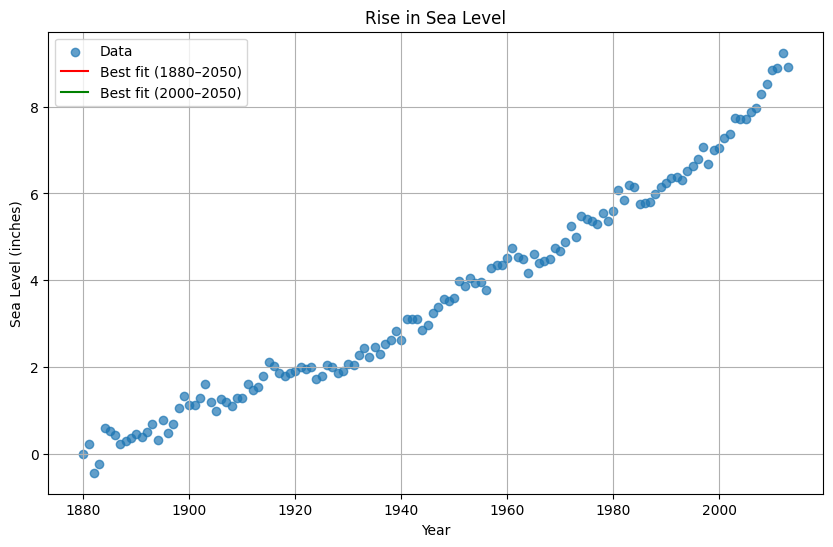

In [20]:
def draw_plot():
    # Scatter plot
    plt.figure(figsize=(10, 6))
    plt.scatter(df["Year"], df["CSIRO Adjusted Sea Level"], label="Data", alpha=0.7)

    # First line of best fit (1880–2050)
    slope, intercept, r, p, std_err = linregress(df["Year"], df["CSIRO Adjusted Sea Level"])
    years_extended = pd.Series(range(1880, 2051))
    plt.plot(years_extended, intercept + slope * years_extended, 'r', label="Best fit (1880–2050)")

    # Second line of best fit (2000–2050)
    df_recent = df[df["Year"] >= 2000]
    slope_recent, intercept_recent, r, p, std_err = linregress(df_recent["Year"], df_recent["CSIRO Adjusted Sea Level"])
    years_recent = pd.Series(range(2000, 2051))
    plt.plot(years_recent, intercept_recent + slope_recent * years_recent, 'g', label="Best fit (2000–2050)")

    # Labels & title
    plt.xlabel("Year")
    plt.ylabel("Sea Level (inches)")
    plt.title("Rise in Sea Level")
    plt.legend()
    plt.grid(True)
    plt.show()

# Call the function
draw_plot()
